## Movie profitability over the years
Tracking the success of movies across multiple genres from the mid 1800's to 2017, as determined by net revenue.

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#dataset retrieved from https://www.kaggle.com/rounakbanik/the-movies-dataset
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


I grabbed the relevant columns: genre, release date, revenue, etc. The title of each movie is just thrown in there for fun.

In [2]:
data = df[["original_title", "genres", "release_date", "budget", "revenue", "vote_average"]]
data.head()

,original_title,genres,release_date,budget,revenue,vote_average
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,30000000,373554033.0,7.7
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,65000000,262797249.0,6.9
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,0,0.0,6.5
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,16000000,81452156.0,6.1
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,0,76578911.0,5.7


Next, the data is placed into nested dictionaries according to their intended purposes. Because I first want to see how the net profit of films within different genres has changed over the years, the first dictionary uses years as secondary keys for which net profits are stored as cooresponding values. 

The second dictionary uses average audience rating as secondary keys, again storing net profits as corresponding values. This gives us a sense of how audience perception of the each film was rewarded financially.

In [3]:
collection_by_year = {}
collection_by_rating = {}
for row in range(len(df)):
    stryear = str(data.iloc[row]["release_date"])[:4] #retrieve the year when the film was released
    if stryear == 'nan' or int(stryear) < 1800 or int(stryear) > 2017:
        continue
    year = int(stryear) #convert to integer so iteration becomes easier
    
    budget = float(data.iloc[row]["budget"])
    revenue = float(data.iloc[row]["revenue"])
    if budget <= 0 or revenue <= 0:
        continue
    
    rating = float(data.iloc[row]["vote_average"])
    profit_ratio = math.log(revenue/budget)
    profit = revenue - budget
    for genre in ast.literal_eval(data.iloc[row]['genres']): #add net revenue to totals for each genre
        if genre['name'] not in collection_by_year:
            collection_by_year[genre['name']] = {}
            collection_by_rating[genre['name']] = {}
        if year not in collection_by_year[genre['name']]:
            collection_by_year[genre['name']][year] = profit
        else:
            collection_by_year[genre['name']][year] += profit
            
        collection_by_rating[genre['name']][profit_ratio] = rating
        

We then plot the data to visualize the revenue that each movie genre took in over time.

<function matplotlib.pyplot.show(*args, **kw)>

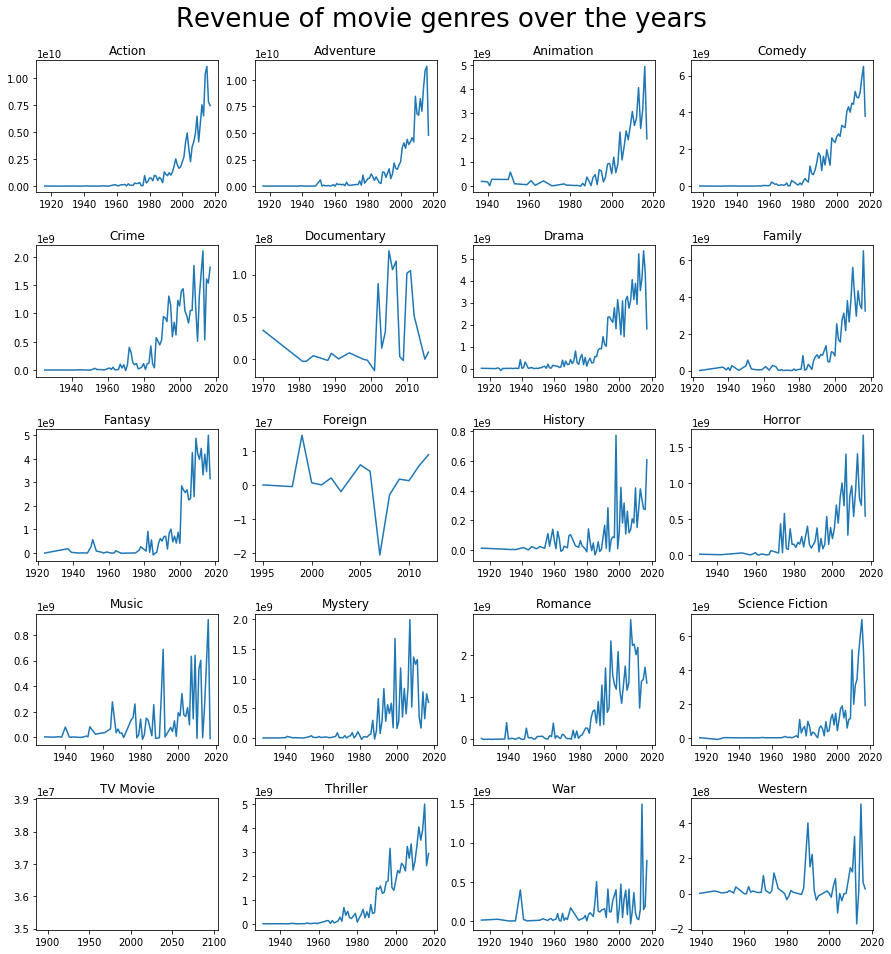

In [4]:
index = 1
fig = plt.figure(figsize=(15,15))
for genre in sorted(collection_by_year.keys()):
    lists = sorted(collection_by_year[genre].items())
    x,y = zip(*lists)
    #plt.figure(figsize)
    plt.subplot(5,4,index)
    plt.title(genre)
    plt.plot(x,y)
    index += 1
plt.subplots_adjust(top=0.93, hspace=0.4) #add space between rows
fig.suptitle("Revenue of movie genres over the years", fontsize=26)
plt.show

In general, all of these plots trend upwards, which can be explained as a byproduct of inflation. But some of these films no doubt have significantly bigger budgets than others. We can attempt to reduce the impact of this by calculating the ratio between revenue and budget for each film

<function matplotlib.pyplot.show(*args, **kw)>

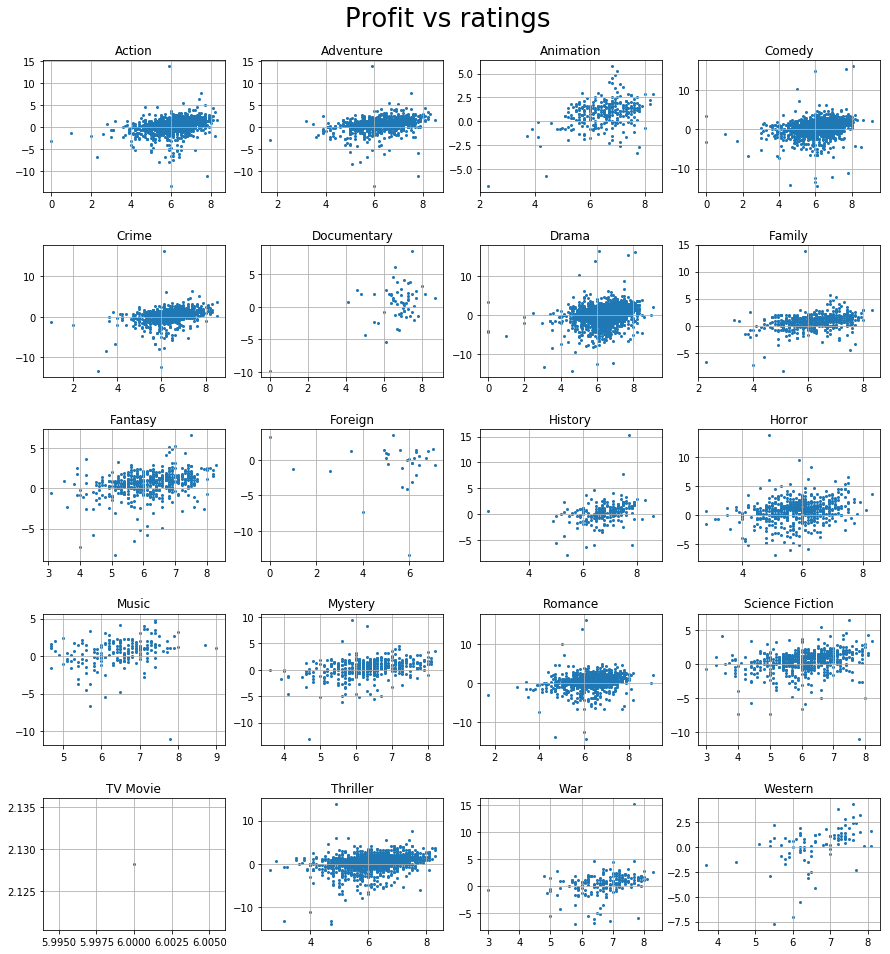

In [5]:
index = 1
fig = plt.figure(figsize=(15,15))
for genre in sorted(collection_by_rating.keys()):
    lists = sorted(collection_by_rating[genre].items())
    y,x = zip(*lists)
    #plt.figure(figsize)
    plt.subplot(5,4,index)
    plt.title(genre)
    plt.scatter(x,y,s=4)
    plt.grid()
    index += 1
plt.subplots_adjust(top=0.93, hspace=0.4) #add space between rows
fig.suptitle("Profit vs ratings", fontsize=26)
plt.show